
## Flight Price Prediction Case Study Using PyCaret

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

#### https://github.com/abhisheksinghblr/datasets/tree/master/flight_price

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
train_df=pd.read_excel('Data_Train.xlsx')
test_df=pd.read_excel('Test_set.xlsx')

In [4]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
big_df=train_df.append(test_df,sort=False)

In [7]:
big_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [8]:
big_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

## Feature Engineering 

In [9]:
big_df['Date']=big_df['Date_of_Journey'].str.split('/').str[0]
big_df['Month']=big_df['Date_of_Journey'].str.split('/').str[1]
big_df['Year']=big_df['Date_of_Journey'].str.split('/').str[2]

In [10]:
big_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [11]:
big_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                object
Month               object
Year                object
dtype: object

In [12]:
big_df['Date']=big_df['Date'].astype(int)
big_df['Month']=big_df['Month'].astype(int)
big_df['Year']=big_df['Year'].astype(int)

In [13]:
big_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int64
Month                int64
Year                 int64
dtype: object

In [14]:
big_df=big_df.drop(['Date_of_Journey'],axis=1)

In [15]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [16]:
big_df['Arrival_Time']=big_df['Arrival_Time'].str.split(' ').str[0]

In [17]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [18]:
big_df[big_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480.0,6,5,2019


In [19]:
big_df['Total_Stops']=big_df['Total_Stops'].fillna('1 stop')

In [20]:
big_df['Total_Stops']=big_df['Total_Stops'].replace('non-stop','0 stop')

In [21]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [22]:
big_df['Stop'] = big_df['Total_Stops'].str.split(' ').str[0]

In [23]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,1


In [24]:
big_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int64
Month                int64
Year                 int64
Stop                object
dtype: object

In [25]:
big_df['Stop']=big_df['Stop'].astype(int)
big_df=big_df.drop(['Total_Stops'],axis=1)

In [26]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302.0,1,3,2019,1


In [27]:
big_df['Arrival_Hour'] = big_df['Arrival_Time'] .str.split(':').str[0]
big_df['Arrival_Minute'] = big_df['Arrival_Time'] .str.split(':').str[1]

In [28]:
big_df['Arrival_Hour']=big_df['Arrival_Hour'].astype(int)
big_df['Arrival_Minute']=big_df['Arrival_Minute'].astype(int)
big_df=big_df.drop(['Arrival_Time'],axis=1)

In [29]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,No info,3897.0,24,3,2019,0,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,No info,7662.0,1,5,2019,2,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,No info,13882.0,9,6,2019,2,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,No info,6218.0,12,5,2019,1,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,No info,13302.0,1,3,2019,1,21,35


In [30]:
big_df['Departure_Hour'] = big_df['Dep_Time'] .str.split(':').str[0]
big_df['Departure_Minute'] = big_df['Dep_Time'] .str.split(':').str[1]

In [31]:
big_df['Departure_Hour']=big_df['Departure_Hour'].astype(int)
big_df['Departure_Minute']=big_df['Departure_Minute'].astype(int)
big_df=big_df.drop(['Dep_Time'],axis=1)

In [32]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50


In [33]:
big_df['Route_1']=big_df['Route'].str.split('→ ').str[0]
big_df['Route_2']=big_df['Route'].str.split('→ ').str[1]
big_df['Route_3']=big_df['Route'].str.split('→ ').str[2]
big_df['Route_4']=big_df['Route'].str.split('→ ').str[3]
big_df['Route_5']=big_df['Route'].str.split('→ ').str[4]

In [34]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,NaN,NaN


In [35]:
big_df['Price'].fillna((big_df['Price'].mean()),inplace=True)

In [36]:
big_df['Route_1'].fillna("None",inplace=True)
big_df['Route_2'].fillna("None",inplace=True)
big_df['Route_3'].fillna("None",inplace=True)
big_df['Route_4'].fillna("None",inplace=True)
big_df['Route_5'].fillna("None",inplace=True)

In [37]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [38]:
big_df=big_df.drop(['Route'],axis=1)
big_df=big_df.drop(['Duration'],axis=1)

In [39]:
big_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [40]:
big_df.isnull().sum()

Airline             0
Source              0
Destination         0
Additional_Info     0
Price               0
Date                0
Month               0
Year                0
Stop                0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
dtype: int64

In [41]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
big_df["Airline"]=encoder.fit_transform(big_df['Airline'])
big_df["Source"]=encoder.fit_transform(big_df['Source'])
big_df["Destination"]=encoder.fit_transform(big_df['Destination'])
big_df["Additional_Info"]=encoder.fit_transform(big_df['Additional_Info'])
big_df["Route_1"]=encoder.fit_transform(big_df['Route_1'])
big_df["Route_2"]=encoder.fit_transform(big_df['Route_2'])
big_df["Route_3"]=encoder.fit_transform(big_df['Route_3'])
big_df["Route_4"]=encoder.fit_transform(big_df['Route_4'])
big_df["Route_5"]=encoder.fit_transform(big_df['Route_5'])

In [42]:
big_df = big_df.drop(['Year'], axis=1)

In [43]:
big_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.0,1,5,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,13882.0,9,6,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,6218.0,12,5,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,13302.0,1,3,1,21,35,16,50,0,34,8,12,4


In [48]:
big_df.dtypes

Airline               int64
Source                int64
Destination           int64
Additional_Info       int64
Price               float64
Date                  int64
Month                 int64
Stop                  int64
Arrival_Hour          int64
Arrival_Minute        int64
Departure_Hour        int64
Departure_Minute      int64
Route_1               int64
Route_2               int64
Route_3               int64
Route_4               int64
Route_5               int64
dtype: object

## Regression Setup

In [51]:
from pycaret.regression import *

In [52]:
df_train=big_df[0:10683]
df_test=big_df[10683:]

In [53]:
regression_setup = setup(data = df_train, target = 'Price', session_id=123,
                  normalize = True, transformation = True, transform_target = True, 
                  combine_rare_levels = True, rare_level_threshold = 0.05,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,True
2,Transform Target Method,box-cox
3,Original Data,"(10683, 17)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,12
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## Compare Models

In [56]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,898.428,2.6643e+06,1601.15,0.8814,0.1407,0.1005
1,Random Forest,659.424,2.83016e+06,1620.18,0.8767,0.1324,0.0721
2,Light Gradient Boosting Machine,864.981,3.39605e+06,1751.68,0.855,0.1404,0.0955
3,Extra Trees Regressor,687.448,3.70445e+06,1862.11,0.835,0.1506,0.0763
4,Support Vector Machine,897.349,3.95594e+06,1904.82,0.8298,0.1509,0.0962
5,Extreme Gradient Boosting,1216.09,3.88063e+06,1948.79,0.8244,0.1829,0.1378
6,Gradient Boosting Regressor,1215.45,3.89217e+06,1950.09,0.8241,0.1827,0.1376
7,Decision Tree,722.35,4.21915e+06,2005.64,0.8105,0.1662,0.0817
8,K Neighbors Regressor,1089.35,4.96009e+06,2177.19,0.7801,0.1901,0.1203
9,Ridge Regression,1617.48,6.03287e+06,2442.72,0.7224,0.2436,0.19


## Creating Models

In [57]:
regression_catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,852.6707,1.687936e+06,1299.2058,0.9106,0.1297,0.0958
1,926.7683,3.938635e+06,1984.5994,0.8361,0.1383,0.0976
2,837.1334,1.644055e+06,1282.2070,0.9066,0.1346,0.0979
3,920.2854,3.770447e+06,1941.7639,0.8458,0.1464,0.1032
4,841.7894,1.502678e+06,1225.8378,0.9178,0.1321,0.0983
5,864.2191,1.911016e+06,1382.3949,0.8963,0.1383,0.0999
6,944.8548,2.502288e+06,1581.8623,0.8860,0.1438,0.1012
7,927.0252,3.303295e+06,1817.4968,0.8743,0.1516,0.1001
8,980.0141,4.479033e+06,2116.3727,0.8418,0.1508,0.1081
9,889.5180,1.903626e+06,1379.7195,0.8992,0.1418,0.1026


In [58]:
regression_catboost

In [59]:
regression_rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,581.4085,1.290554e+06,1136.0255,0.9316,0.1173,0.0665
1,773.2188,5.345630e+06,2312.0618,0.7775,0.1536,0.0777
2,585.9381,1.256375e+06,1120.8814,0.9286,0.1148,0.0682
3,719.0496,3.572484e+06,1890.1016,0.8539,0.1358,0.0768
4,621.2494,1.453777e+06,1205.7268,0.9205,0.1256,0.0734
5,609.3233,2.083325e+06,1443.3728,0.8869,0.1278,0.0681
6,642.7547,2.122236e+06,1456.7897,0.9034,0.1279,0.0678
7,704.4655,4.364631e+06,2089.1700,0.8339,0.1438,0.0710
8,729.8273,5.214791e+06,2283.5918,0.8158,0.1463,0.0784
9,627.0009,1.597790e+06,1264.0373,0.9154,0.1308,0.0730


In [60]:
regression_rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

## Hyperparameter Tuning

In [61]:
tune_catboost = tune_model('catboost',n_iter=25)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,623.2940,1.152081e+06,1073.3503,0.9390,0.1062,0.0702
1,769.8729,5.207885e+06,2282.0791,0.7833,0.1348,0.0771
2,657.3836,1.583800e+06,1258.4912,0.9100,0.1110,0.0751
3,754.5285,3.129309e+06,1768.9852,0.8720,0.1248,0.0812
4,648.0149,1.135347e+06,1065.5265,0.9379,0.1153,0.0764
5,638.1428,1.381748e+06,1175.4778,0.9250,0.1154,0.0741
6,677.7696,1.799479e+06,1341.4466,0.9181,0.1175,0.0732
7,715.6170,3.050576e+06,1746.5898,0.8839,0.1286,0.0731
8,738.1543,3.733174e+06,1932.1422,0.8681,0.1267,0.0811
9,670.4600,1.344880e+06,1159.6896,0.9288,0.1180,0.0773


In [62]:
tune_catboost

## Plot the Model

In [65]:
plot_model(regression_rf, plot = 'parameter')

,Parameters
bootstrap,True
ccp_alpha,0
criterion,mse
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0
min_impurity_split,None
min_samples_leaf,1


## Ensemble a Model

### Bagging

In [66]:
bagged_catboost = ensemble_model(regression_catboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,864.3777,1.746393e+06,1321.5118,0.9075,0.1316,0.0975
1,942.8522,4.096536e+06,2023.9901,0.8295,0.1413,0.0995
2,858.9163,1.775842e+06,1332.6072,0.8991,0.1383,0.1004
3,935.7532,3.804294e+06,1950.4599,0.8444,0.1492,0.1057
4,862.1735,1.586710e+06,1259.6467,0.9132,0.1354,0.1008
5,873.0811,1.975292e+06,1405.4506,0.8928,0.1409,0.1012
6,962.8888,2.627965e+06,1621.0998,0.8803,0.1471,0.1034
7,981.0782,4.021630e+06,2005.4002,0.8469,0.1556,0.1044
8,1017.8400,5.617314e+06,2370.0873,0.8016,0.1556,0.1108
9,903.6274,1.970243e+06,1403.6534,0.8957,0.1455,0.1050


In [67]:
print(bagged_catboost)

BaggingRegressor(base_estimator=<catboost.core.CatBoostRegressor object at 0x7f4739a5cbd0>,
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
                 random_state=123, verbose=0, warm_start=False)


### Boosting

In [ ]:
boosted_catboost = ensemble_model(regression_catboost, method = 'Boosting')

In [ ]:
print(bagged_catboost)

### Blending

In [ ]:
blender = blend_models(estimator_list=[regression_catboost, regression_rf])

In [ ]:
print(blender)

### Stacking

In [ ]:
stacked = stack_models([regression_catboost,regression_rf])

In [ ]:
print(stacked)

## Evaluate the Model

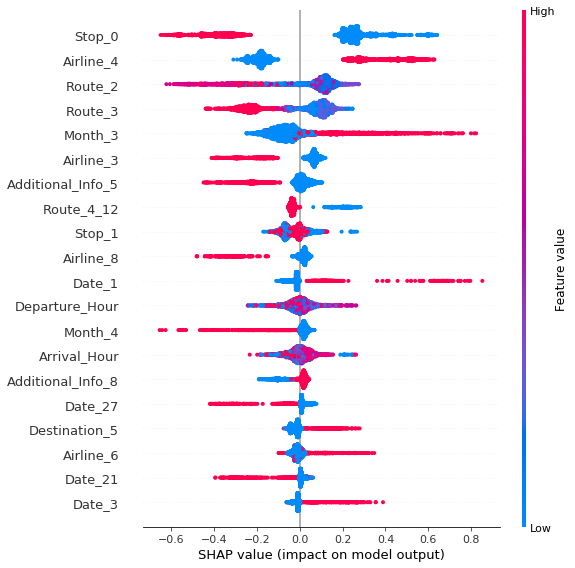

In [69]:
interpret_model(tune_catboost)

## Predict on test / hold-out Sample

In [70]:
df_test

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,4,2,1,8,9087.064121,6,6,1,4,25,17,30,3,7,6,12,4
1,3,3,0,8,9087.064121,12,5,1,10,20,6,20,2,33,3,12,4
2,4,2,1,5,9087.064121,21,5,1,19,0,19,15,3,7,6,12,4
3,6,2,1,8,9087.064121,21,5,1,21,0,8,0,3,7,6,12,4
4,0,0,2,8,9087.064121,24,6,0,2,45,23,55,0,13,24,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,8,9087.064121,6,6,1,20,25,20,30,2,14,3,12,4
2667,3,3,0,8,9087.064121,27,3,0,16,55,14,20,2,5,24,12,4
2668,4,2,1,8,9087.064121,6,3,1,4,25,21,50,3,7,6,12,4
2669,1,2,1,8,9087.064121,6,3,1,19,15,4,0,3,7,6,12,4


In [71]:
df_test = df_test.drop(['Price'], axis=1)

In [73]:
df_test

,Airline,Source,Destination,Additional_Info,Date,Month,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,4,2,1,8,6,6,1,4,25,17,30,3,7,6,12,4
1,3,3,0,8,12,5,1,10,20,6,20,2,33,3,12,4
2,4,2,1,5,21,5,1,19,0,19,15,3,7,6,12,4
3,6,2,1,8,21,5,1,21,0,8,0,3,7,6,12,4
4,0,0,2,8,24,6,0,2,45,23,55,0,13,24,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,8,6,6,1,20,25,20,30,2,14,3,12,4
2667,3,3,0,8,27,3,0,16,55,14,20,2,5,24,12,4
2668,4,2,1,8,6,3,1,4,25,21,50,3,7,6,12,4
2669,1,2,1,8,6,3,1,19,15,4,0,3,7,6,12,4


In [74]:
predictions = predict_model(tune_catboost, data=df_test)

In [75]:
predictions

,Airline,Source,Destination,Additional_Info,Date,Month,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Label
0,4,2,1,8,6,6,1,4,25,17,30,3,7,6,12,4,14833.9522
1,3,3,0,8,12,5,1,10,20,6,20,2,33,3,12,4,4228.2427
2,4,2,1,5,21,5,1,19,0,19,15,3,7,6,12,4,12821.4345
3,6,2,1,8,21,5,1,21,0,8,0,3,7,6,12,4,10439.7777
4,0,0,2,8,24,6,0,2,45,23,55,0,13,24,12,4,3694.7729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,8,6,6,1,20,25,20,30,2,14,3,12,4,9910.4567
2667,3,3,0,8,27,3,0,16,55,14,20,2,5,24,12,4,4035.7483
2668,4,2,1,8,6,3,1,4,25,21,50,3,7,6,12,4,16985.3431
2669,1,2,1,8,6,3,1,19,15,4,0,3,7,6,12,4,12894.8907


## Save Model

In [76]:
save_model(tune_catboost, 'tune_catboost_1')

Transformation Pipeline and Model Succesfully Saved


## Load Model

In [77]:
load_tune_catboost = load_model(model_name='tune_catboost_1')

Transformation Pipeline and Model Sucessfully Loaded


In [78]:
print(load_tune_catboost)

[Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='regression',
                                      numerical_features=[], target='Price',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Levels_i...
                ('cluster_all', Empty()), ('dummy', Dummify(target='Price')),
                ('fix_perfect', Remove_100(target='Price')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', Empty()),
                ('fix_multi',
                 Fix_multicollinearity(correlation_with